<a href="https://colab.research.google.com/github/asrabanu123/machineleaning/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing # Changed import to fetch_california_housing
import warnings

# load the data set
housing = fetch_california_housing() # Changed load_housing to fetch_california_housing
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

In [11]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
housing_df.shape

(20640, 9)

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
housing_df.fillna(housing_df.mean(), inplace=True)

In [13]:
#check for missing values and handle them
housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
housing_df.iloc[:, :-1] = imputer.fit_transform(housing_df.iloc[:, :-1])

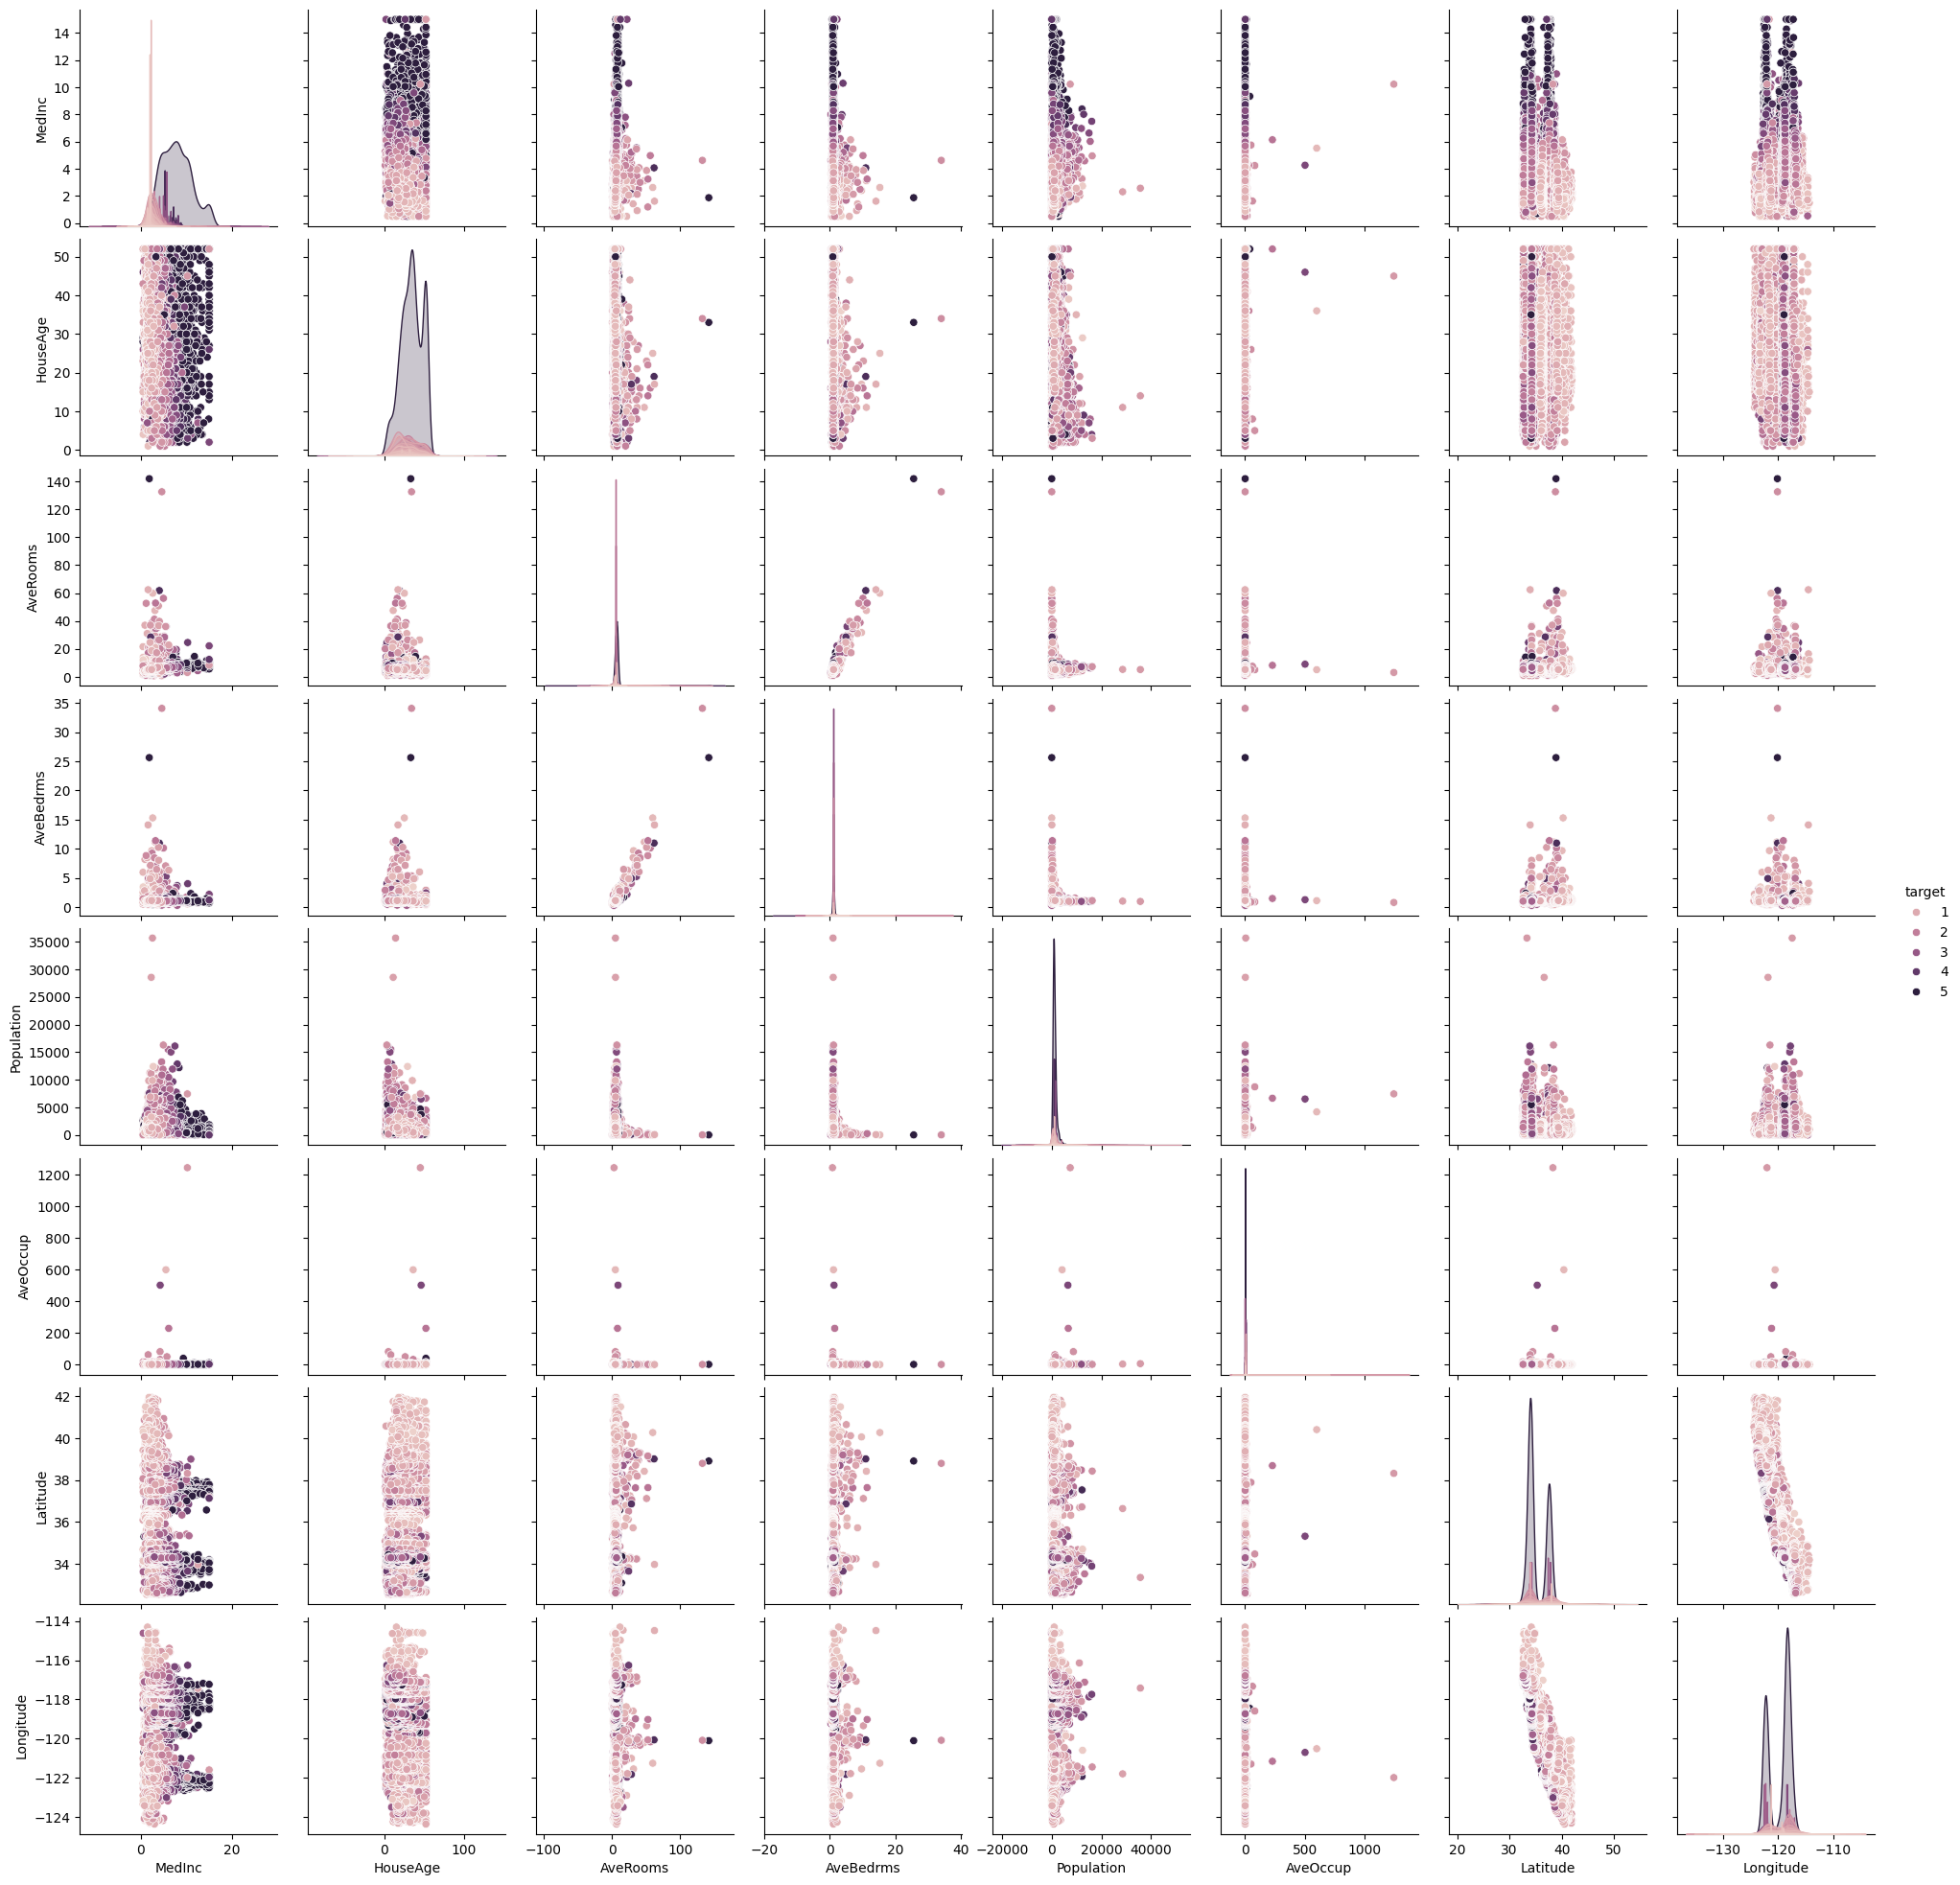

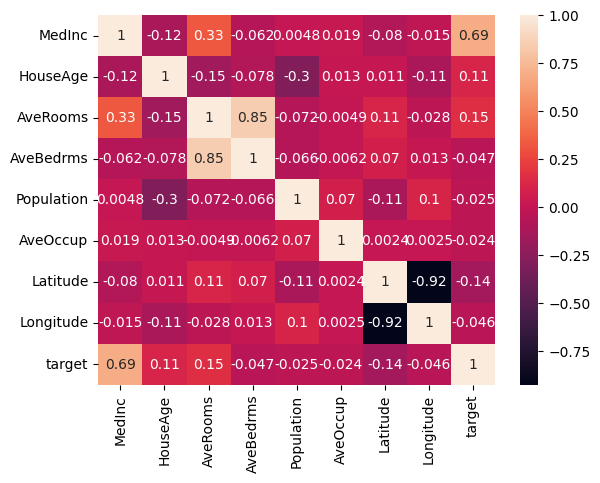

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(housing_df, hue='target')
plt.show()

# Correlation matrix
sns.heatmap(housing_df.corr(), annot=True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_housing = housing_df.drop('target', axis=1)
y_housing = housing_df['target']
scaler = StandardScaler()
X_housing = scaler.fit_transform(X_housing)
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

In [16]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred_lin_reg)}')

Linear Regression MSE: 0.555891598695244


In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor


In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred_tree)}')

Decision Tree MSE: 0.504159685279966


In [20]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred_forest)}')

Random Forest MSE: 0.25459283490592755


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'ANN Mean Squared Error: {loss}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.7905
Epoch 2/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4599
Epoch 3/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3977
Epoch 4/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3684
Epoch 5/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3557
Epoch 6/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3526
Epoch 7/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3279
Epoch 8/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3338
Epoch 9/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3503
Epoch 10/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3197
Epoch 11/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3191
Epoch 12/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3191
Epoch 13/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3060
Epoch 14/50
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3099
Epoch 15/50
1652/1652 ━━━━━━━